In [238]:
import torch
from torch.utils.data import Dataset, random_split, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [239]:
train_set = datasets.MNIST(root='data', train=True, transform=ToTensor(), download=True)
test_set = datasets.MNIST(root='data', train=False, transform=ToTensor(), download=True)

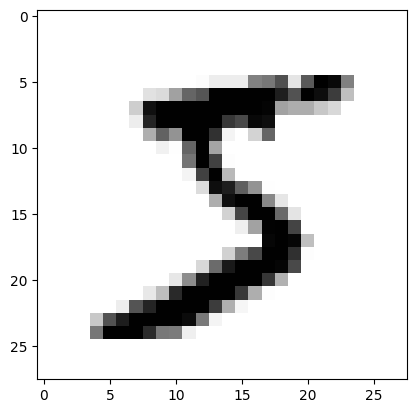

In [240]:
example, _ = next(iter(train_set))
plt.imshow(example.numpy()[0], cmap='gray_r')

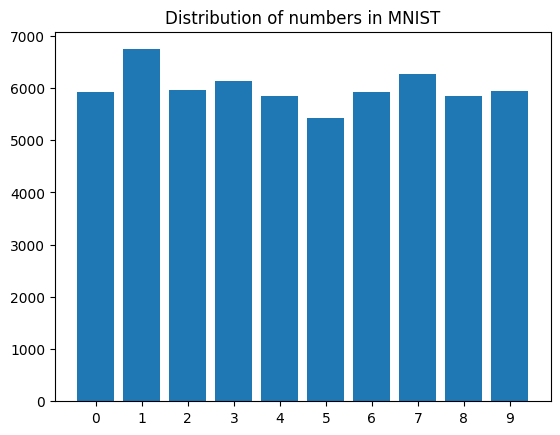

In [245]:
numbers = {}
for i in range(10):
    numbers[str(i)] = len(train_set.data[train_set.targets == i])
    
plt.title('Distribution of numbers in MNIST')
plt.bar(numbers.keys(), numbers.values())
plt.show()

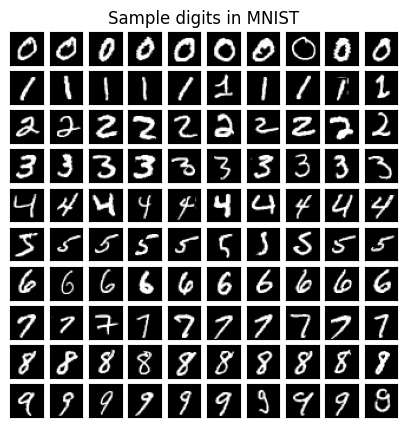

In [251]:

from itertools import islice

fig = plt.figure(figsize=(5, 5))
plt.title('Sample digits in MNIST')
plt.axis('off')

for digit in range(10):
    for i, example in islice(enumerate(train_set.data[train_set.targets == digit]), 10):
        ax = fig.add_subplot(10, 10, digit * 10 + i + 1)
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(example, cmap='gray')

plt.show()

In [236]:
[len(train_set) * (1 - 0.3), len(train_set) * 0.3]

[42000.0, 18000.0]

In [209]:
train_set, valid_set = random_split(train_set, [len(train_set) - len(test_set), len(test_set)], generator=torch.Generator().manual_seed(1))
print(f'Training set contains {len(train_set)} examples.\nValidation set contains {len(valid_set)} examples\nTest set contains {len(test_set)} examples')

Training set contains 50000 examples.
Validation set contains 10000 examples
Test set contains 10000 examples


In [227]:
train_dl = DataLoader(train_set, batch_size=64, shuffle=True)
valid_dl = DataLoader(valid_set, batch_size=64, shuffle=True)
test_dl = DataLoader(test_set, batch_size=64, shuffle=True)

In [231]:
len(valid_dl.dataset)

10000